# ML application with Keras

Welcome to your last programming assignment. In this notebook I'll show an example of how to implement classification using Keras. __Make sure to watch the ML techniques videos before this__, and good luck!

*Use ctrl + on windows, or cmd + on mac to make the code bigger, and relpace the + with a - to make the code smaller*

*Press __shift + enter__ to run a code block*

### Notes

I didn't manage to get the markdown (nice looking text boxes) done, so all of the notes will be as comments in the python. This code showcases very little of Keras can do, so do go to [the official Keras website](https://keras.io) to look at the docs and see what you could use for your applications

# Info about the data

Have a look at this link to learn more about the data - [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)

Here is a quick summary:

__Data Set Information:__

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


__Attribute Information:__

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [1]:
#importing cool stuff for your ML application

#pandas for data manipulation
import pandas as pd

#numpy for manipulation of matrices vectors, and numbers in general
import numpy as np

#keras is the main "framework" you'll be using 
import keras 
from keras.layers import Dense
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

#seaborn is also usedd for data manipulation
import seaborn as sns

#showing data, graphs etc
import matplotlib.pyplot as plt

#library to help with Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle


#Showing all the plots inside the notebook
%matplotlib inline

In [2]:
#reading the raw data
raw_data = pd.read_csv("data/iris.data", header=None)

In [3]:
#printing the top 5 lines of your data to see what it looks like

raw_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#getting the train data by removing the labels (which are in column 4)
x_temp = raw_data.drop(4, axis = 1)

#getting the row numbers for the labels
y_temp_list = [0,1,2,3]

#creating thhe labels array by removing columns 0,1,2,3 - chosen in y_temp_list
y_temp = raw_data.drop(y_temp_list, axis = 1)

#y_temp.head()

#x_temp.head()

#converting all of the previous variables into numpy arrays (easier to deal with)
y_temp = np.array(y_temp)
x_temp = np.array(x_temp)

#printing the shapes of your data
print(x_temp.shape,y_temp.shape)

#printing the first 5 items in your ddata
print('\n',x_temp[:5],'\n\n', y_temp[:5])

(150, 4) (150, 1)

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

 [['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]


In [5]:
#This is where the one hot encoding happens

#encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_temp)
encoded_Y = encoder.transform(y_temp)

#Converts labels (3 different types of strings) to one hot versions of 3 classes.
y_temp_2 = np_utils.to_categorical(encoded_Y)

print(y_temp_2[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [6]:
#shuffling datasets so that labels dont just go 1,1,1...1,0,0,0...0 etc

print('\n \n',x_temp[:5],'\n \n',y_temp_2[:5])

x_shuffled, y_shuffled = shuffle(x_temp, y_temp_2, random_state=6)


#The last printed matrix shows the one hot encoded labels
print('\n \n',x_shuffled[:5],'\n \n',y_shuffled[:5])


 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 
 
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

 
 [[5.  3.6 1.4 0.2]
 [6.5 3.  5.5 1.8]
 [4.7 3.2 1.3 0.2]
 [5.1 3.3 1.7 0.5]
 [6.3 2.7 4.9 1.8]] 
 
 [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [7]:
#Splitting the data into 80% train and 20% test

X_train, X_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size=0.2, random_state = 6)

print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

(120, 4) (120, 3)

(30, 4) (30, 3)


In [8]:
#Here is the ML part of the algorithm

#Defining what the shape of your inputs for the algorithm is
inputs = Input(shape=(X_train.shape))

#Adding 32 nodes with ReLU activation, then putting your inputs through that
x = Dense(32, activation='relu')(inputs)

#Then running the output of those nodes into a Softmax unit, the 3 represents the number of output classes
predictions = Dense(3, activation='softmax')(x)

#Defining the inputs and outputs of the model
model = Model(inputs=[inputs], outputs=predictions)

# "compiling the model" which is essentially defining its cost, optimizer 
# and also what metrics you want returned about your model (just accuracy in this case)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

#Printing the summary of your model before running it
model.summary()

#running the model by calling .fit()
#X_train is the training data for the model, batch_size is what sizes of data should be used to train on per step of gradient descent
#y_train is the training labels, valiadtion_split is how much of the training data you want to use for "validation"
#shuffle = True just shuffles the data again to make sure
#epochs = the number of times you want to go over all the data (number of iterations)
finalModel = model.fit(X_train, batch_size=64, y=y_train, validation_split=0.25, 
          shuffle=True, epochs=200)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 4)]          0         
_________________________________________________________________
dense (Dense)                (None, 120, 32)           160       
_________________________________________________________________
dense_1 (Dense)              (None, 120, 3)            99        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 104ms/step - loss: 1.8723 - acc: 0.3111 - val_loss: 1.8760 - val_acc: 0.2333
Epoch 2/200
2/2 [==============================] - 0s 15ms/step - loss: 1.7487 - acc: 0.3111 - val_loss: 1.7483 - val_acc: 0.2333
Epoch 3/200
2/2 [==============================] - 0s 16ms/step - loss: 1.6303 - acc: 0.3111 - val_loss: 1.6307 - val_acc: 0.2333
Ep

Epoch 53/200
2/2 [==============================] - 0s 19ms/step - loss: 0.7354 - acc: 0.8556 - val_loss: 0.7529 - val_acc: 0.7667
Epoch 54/200
2/2 [==============================] - 0s 23ms/step - loss: 0.7303 - acc: 0.8333 - val_loss: 0.7482 - val_acc: 0.7667
Epoch 55/200
2/2 [==============================] - 0s 17ms/step - loss: 0.7253 - acc: 0.8444 - val_loss: 0.7439 - val_acc: 0.7667
Epoch 56/200
2/2 [==============================] - 0s 18ms/step - loss: 0.7204 - acc: 0.8444 - val_loss: 0.7397 - val_acc: 0.8000
Epoch 57/200
2/2 [==============================] - 0s 17ms/step - loss: 0.7153 - acc: 0.8667 - val_loss: 0.7358 - val_acc: 0.8000
Epoch 58/200
2/2 [==============================] - 0s 16ms/step - loss: 0.7109 - acc: 0.8667 - val_loss: 0.7320 - val_acc: 0.9000
Epoch 59/200
2/2 [==============================] - 0s 17ms/step - loss: 0.7059 - acc: 0.9222 - val_loss: 0.7281 - val_acc: 0.9333
Epoch 60/200
2/2 [==============================] - 0s 17ms/step - loss: 0.7014 - a

2/2 [==============================] - 0s 14ms/step - loss: 0.5168 - acc: 0.9556 - val_loss: 0.5557 - val_acc: 0.9667
Epoch 116/200
2/2 [==============================] - 0s 15ms/step - loss: 0.5140 - acc: 0.9444 - val_loss: 0.5528 - val_acc: 1.0000
Epoch 117/200
2/2 [==============================] - 0s 14ms/step - loss: 0.5115 - acc: 0.9444 - val_loss: 0.5499 - val_acc: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 14ms/step - loss: 0.5092 - acc: 0.9444 - val_loss: 0.5473 - val_acc: 0.9333
Epoch 119/200
2/2 [==============================] - 0s 14ms/step - loss: 0.5073 - acc: 0.9444 - val_loss: 0.5450 - val_acc: 0.9333
Epoch 120/200
2/2 [==============================] - 0s 14ms/step - loss: 0.5052 - acc: 0.9222 - val_loss: 0.5428 - val_acc: 0.9000
Epoch 121/200
2/2 [==============================] - 0s 14ms/step - loss: 0.5035 - acc: 0.9333 - val_loss: 0.5406 - val_acc: 0.9000
Epoch 122/200
2/2 [==============================] - 0s 19ms/step - loss: 0.5014 - acc: 0.

2/2 [==============================] - 0s 17ms/step - loss: 0.4030 - acc: 0.9556 - val_loss: 0.4420 - val_acc: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 16ms/step - loss: 0.4018 - acc: 0.9556 - val_loss: 0.4405 - val_acc: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 15ms/step - loss: 0.4004 - acc: 0.9556 - val_loss: 0.4392 - val_acc: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 19ms/step - loss: 0.3983 - acc: 0.9444 - val_loss: 0.4378 - val_acc: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 15ms/step - loss: 0.3967 - acc: 0.9444 - val_loss: 0.4364 - val_acc: 1.0000
Epoch 182/200
2/2 [==============================] - 0s 15ms/step - loss: 0.3953 - acc: 0.9444 - val_loss: 0.4350 - val_acc: 1.0000
Epoch 183/200
2/2 [==============================] - 0s 15ms/step - loss: 0.3937 - acc: 0.9444 - val_loss: 0.4338 - val_acc: 1.0000
Epoch 184/200
2/2 [==============================] - 0s 17ms/step - loss: 0.3932 - acc: 0.

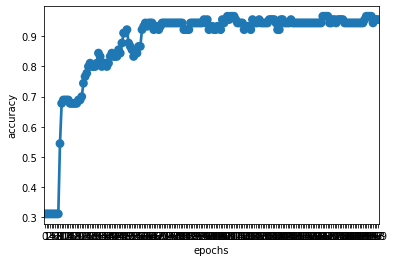

In [9]:
#Plotting accuracy against number of iterations for train data
df = pd.DataFrame({'epochs':finalModel.epoch, 'accuracy': finalModel.history['acc'], 'validation_accuracy': finalModel.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)

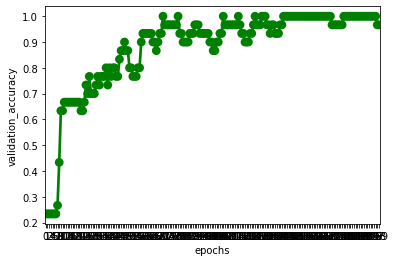

In [10]:
#Plotting accuracy against number of iterations for validation set
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [11]:
#Testing your algorithm on your test data
preds = model.evaluate(x = X_test, y = y_test)

#printing metrics
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 0s 1ms/step - loss: 0.3127 - acc: 1.0000

Loss = 0.3127129375934601
Test Accuracy = 1.0
